In [35]:
# Load Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Load the dataset
weather_data = pd.read_csv('vancouver_weather.csv')

#Preview the dataset
weather_data

,date,max_dew_point_v,max_dew_point_c,max_dew_point_d,max_dew_point_y,max_humidex_v,max_humidex_c,max_humidex_d,max_humidex_y,max_min_temperature_v,...,min_temperature_d,min_temperature_y,min_wind_speed_v,min_wind_speed_c,min_wind_speed_d,min_wind_speed_y,min_windchill_v,min_windchill_c,min_windchill_d,min_windchill_y
0,2024-09-10,17.3,71,1953-09-10 2023-09-10,1995 2007 2020,29.0,17.0,1953-09-10 2023-09-10,2020,15.6,...,1937-09-10 2023-09-10,1964,0,71,1953-09-10 2023-09-10,1958 1959 1960 1963 1964 1965 1966 1967 1969 1...,NaN,NaN,NaN,NaN
1,2024-09-09,18.9,72,1953-09-09 2024-09-09,1963,31.0,13.0,1953-09-09 2021-09-09,1963,16.7,...,1937-09-09 2024-09-09,1945,0,72,1953-09-09 2024-09-09,1955 1957 1959 1960 1961 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
2,2024-09-08,19.0,72,1953-09-08 2024-09-08,1993,30.0,12.0,1963-09-08 2024-09-08,1981,16.6,...,1937-09-08 2024-09-08,1959,0,72,1953-09-08 2024-09-08,1954 1956 1959 1960 1961 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
3,2024-09-07,18.3,72,1953-09-07 2024-09-07,1963 2024,30.0,18.0,1958-09-07 2024-09-07,1993,16.3,...,1937-09-07 2024-09-07,1970,0,72,1953-09-07 2024-09-07,1957 1958 1960 1962 1963 1965 1966 1967 1968 1...,NaN,NaN,NaN,NaN
4,2024-09-06,18.6,72,1953-09-06 2024-09-06,2024,31.0,20.0,1953-09-06 2024-09-06,2017,17.7,...,1937-09-06 2024-09-06,1965,0,72,1953-09-06 2024-09-06,1954 1958 1959 1960 1961 1962 1965 1966 1967 1...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1997-04-30,13.9,45,1953-04-30 1997-04-30,1957,NaN,NaN,NaN,NaN,11.1,...,1937-04-30 1997-04-30,1954,0,45,1953-04-30 1997-04-30,1953 1956 1958 1965 1967 1969 1970 1971 1973 1...,NaN,NaN,NaN,NaN
9996,1997-04-29,13.8,45,1953-04-29 1997-04-29,1992,NaN,NaN,NaN,NaN,10.8,...,1937-04-29 1997-04-29,1975,0,45,1953-04-29 1997-04-29,1954 1955 1956 1958 1963 1967 1968 1970 1972 1...,NaN,NaN,NaN,NaN
9997,1997-04-28,13.6,45,1953-04-28 1997-04-28,1992,NaN,NaN,NaN,NaN,10.6,...,1937-04-28 1997-04-28,1986,0,45,1953-04-28 1997-04-28,1953 1956 1957 1958 1960 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
9998,1997-04-27,13.7,45,1953-04-27 1997-04-27,1992,NaN,NaN,NaN,NaN,11.1,...,1937-04-27 1997-04-27,1948,0,45,1953-04-27 1997-04-27,1958 1960 1961 1965 1966 1967 1968 1969 1970 1...,NaN,NaN,NaN,NaN


In [37]:
# Data Cleaning for Time-Series observation
ts_columns = ['date', 'max_dew_point_v', 'max_humidex_v', 'max_temperature_v', 'max_wind_speed_v',
                   'min_dew_point_v', 'min_temperature_v']
ts = weather_data[ts_columns]
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.rename(columns={
    'max_dew_point_v': 'max_dew_point',
    'max_humidex_v': 'max_humidex',
    'max_temperature_v': 'max_temperature',
    'max_wind_speed_v': 'max_wind_speed',
    'min_dew_point_v': 'min_dew_point',
    'min_temperature_v': 'min_temperature'
})

# Replace any missing values with the average of that column
ts_data.fillna(ts.mean(), inplace=True)

# Preview of dataframe after cleaning
ts_data

C:\Users\7D\AppData\Local\Temp\ipykernel_50648\2332563720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['date'] = pd.to_datetime(ts['date'])


,date,max_dew_point,max_humidex,max_temperature,max_wind_speed,min_dew_point,min_temperature,month,year
0,2024-09-10,17.3,29.000000,26.1,48,3.3,5.6,9,2024
1,2024-09-09,18.9,31.000000,26.0,65,2.0,6.1,9,2024
2,2024-09-08,19.0,30.000000,26.2,63,2.5,6.1,9,2024
3,2024-09-07,18.3,30.000000,25.6,48,0.3,6.1,9,2024
4,2024-09-06,18.6,31.000000,27.6,43,2.8,6.1,9,2024
...,...,...,...,...,...,...,...,...,...
9995,1997-04-30,13.9,30.477612,23.9,39,-11.1,-0.6,4,1997
9996,1997-04-29,13.8,30.477612,23.9,42,-5.0,1.1,4,1997
9997,1997-04-28,13.6,30.477612,21.7,42,-3.9,0.8,4,1997
9998,1997-04-27,13.7,30.477612,25.0,53,-8.3,-0.6,4,1997


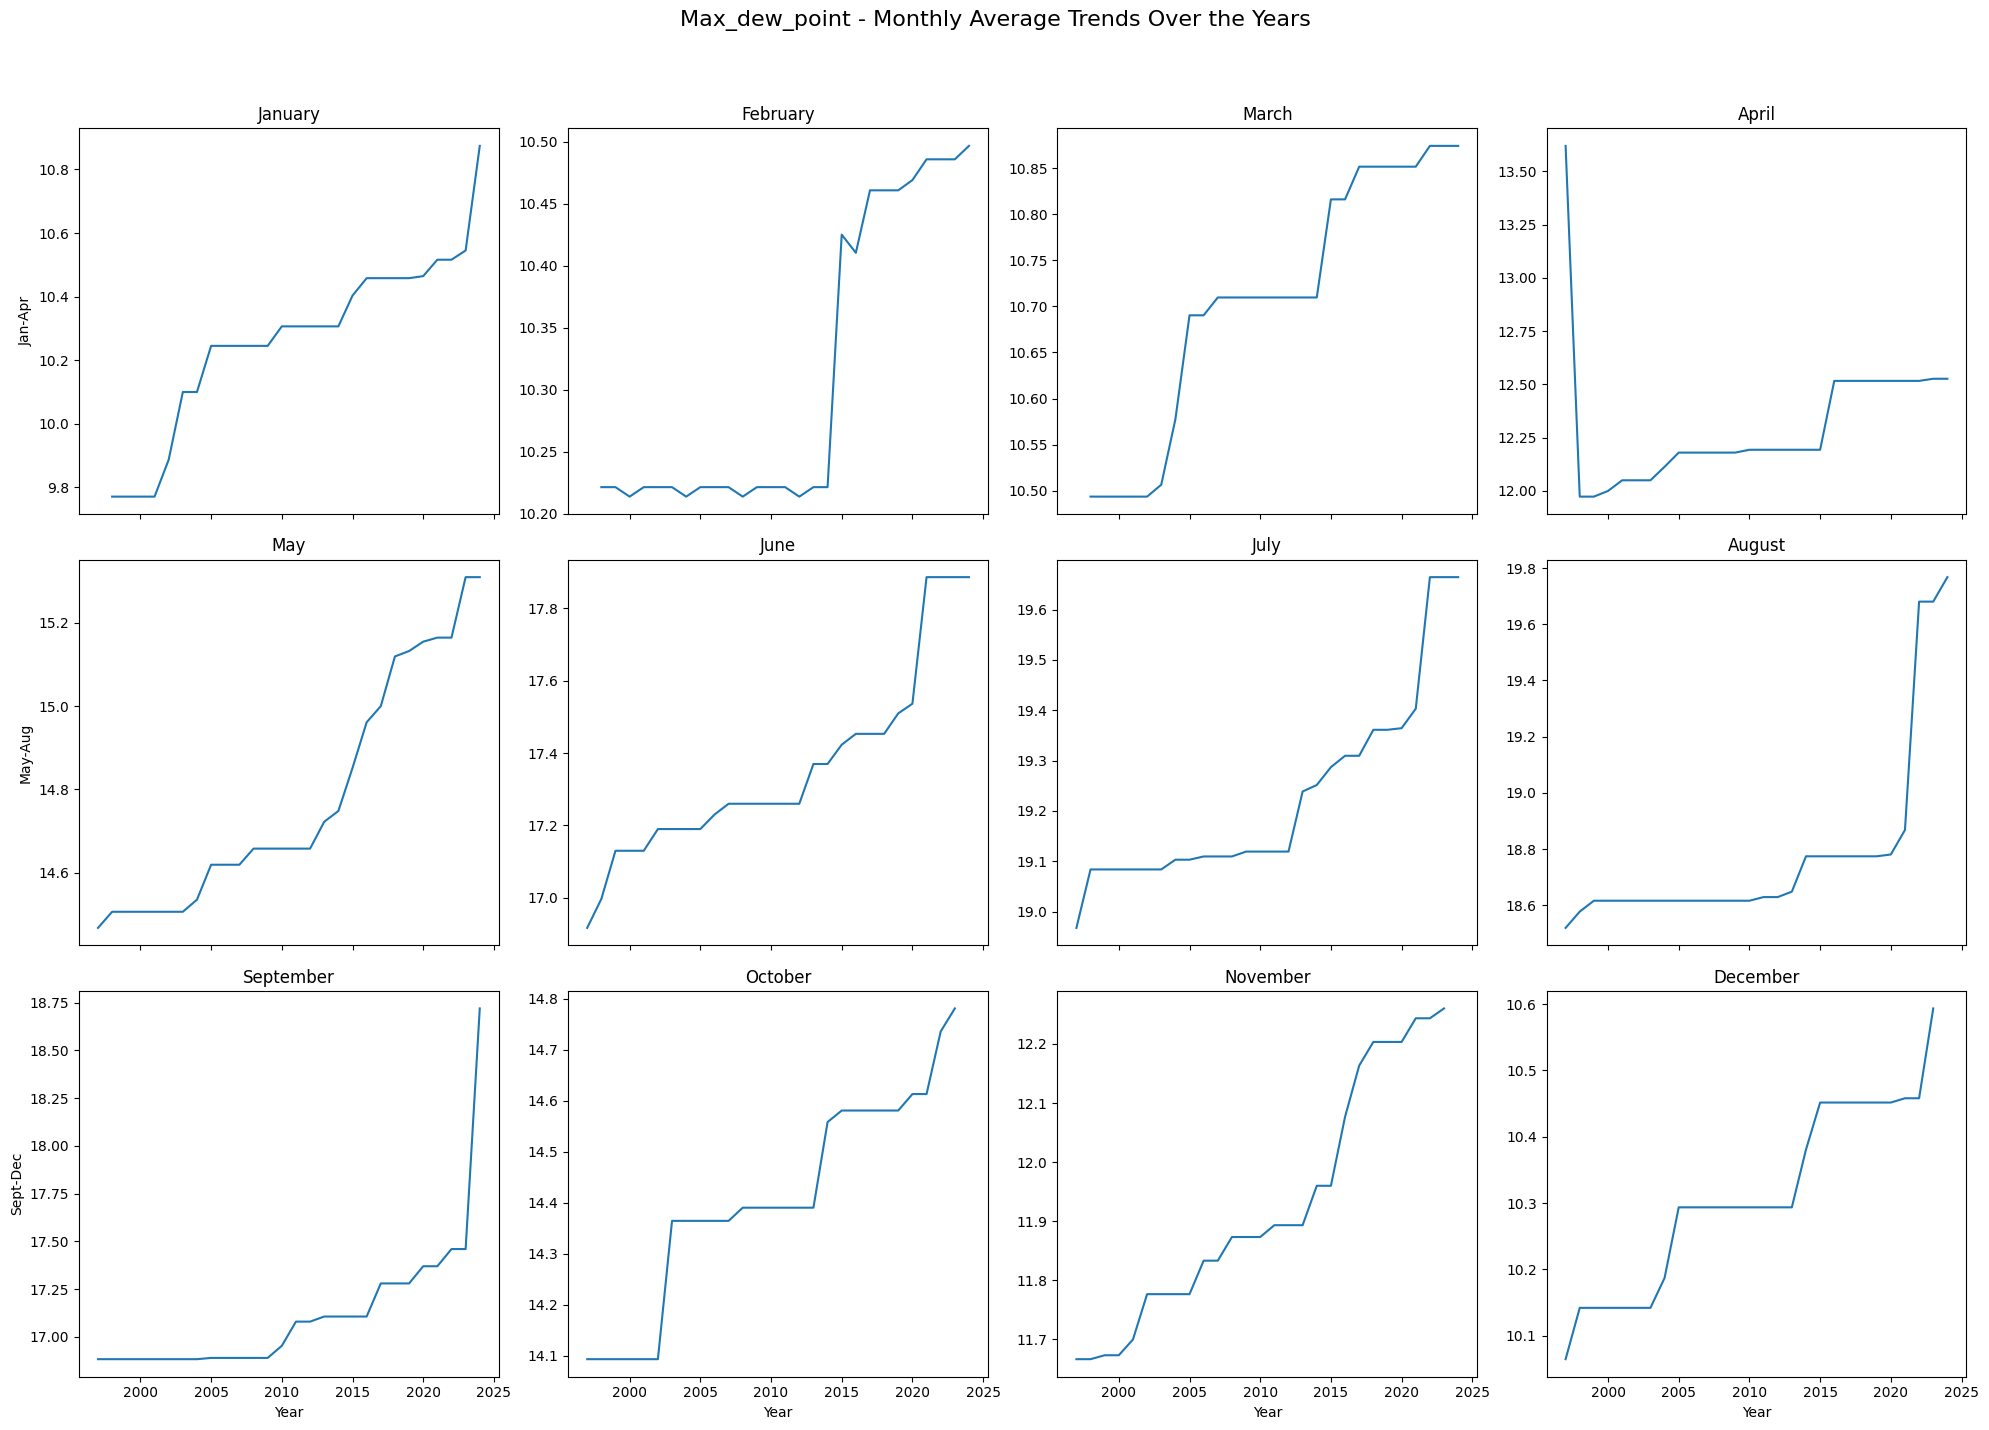

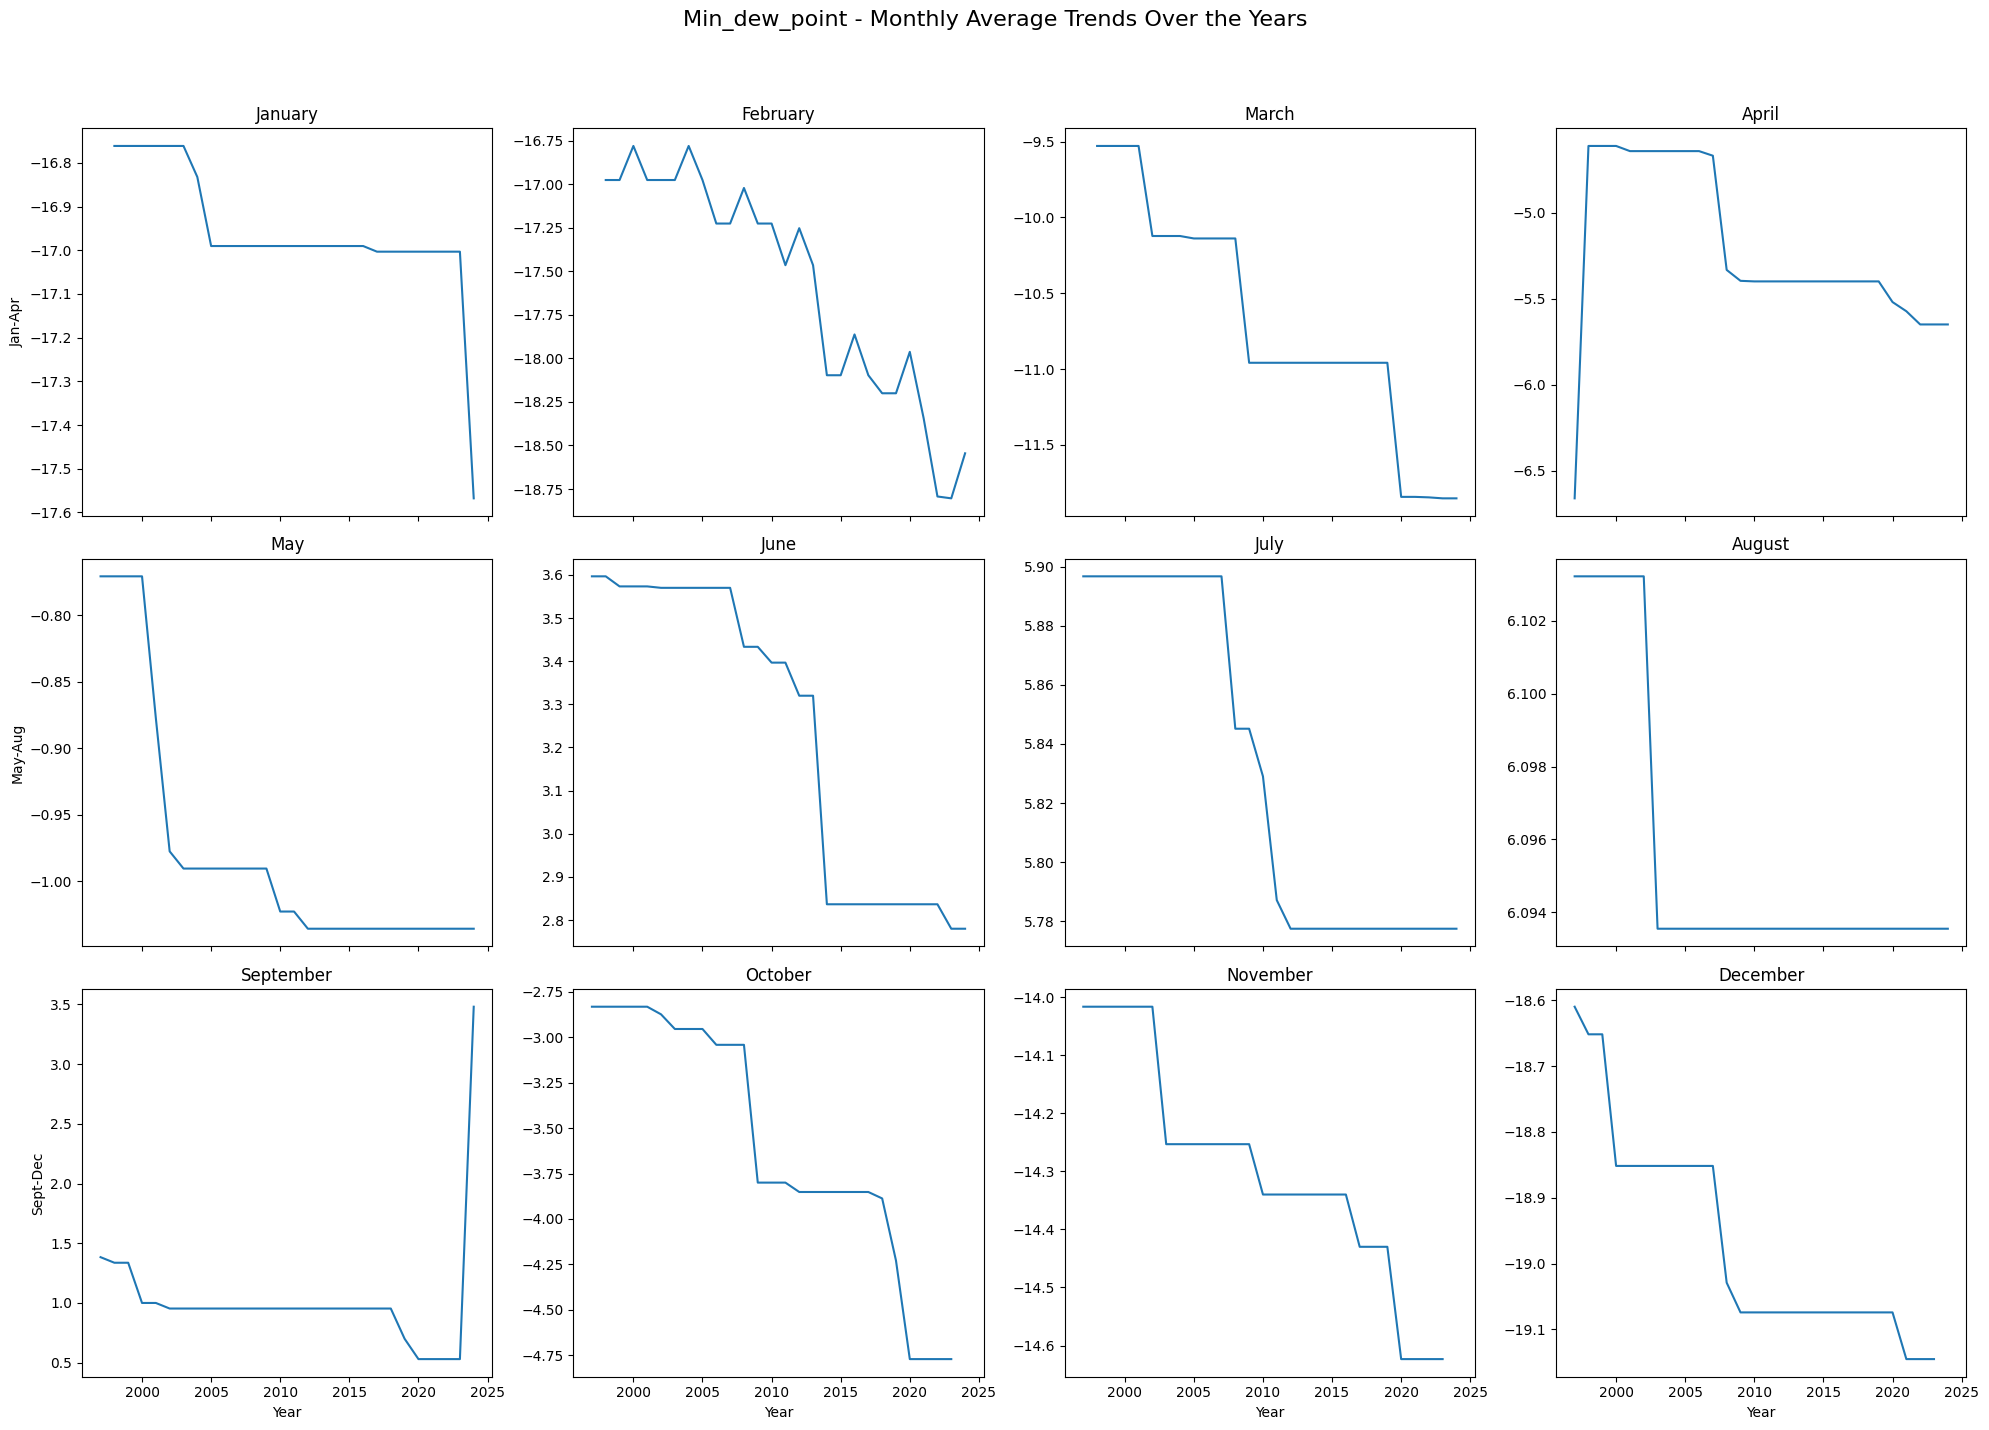

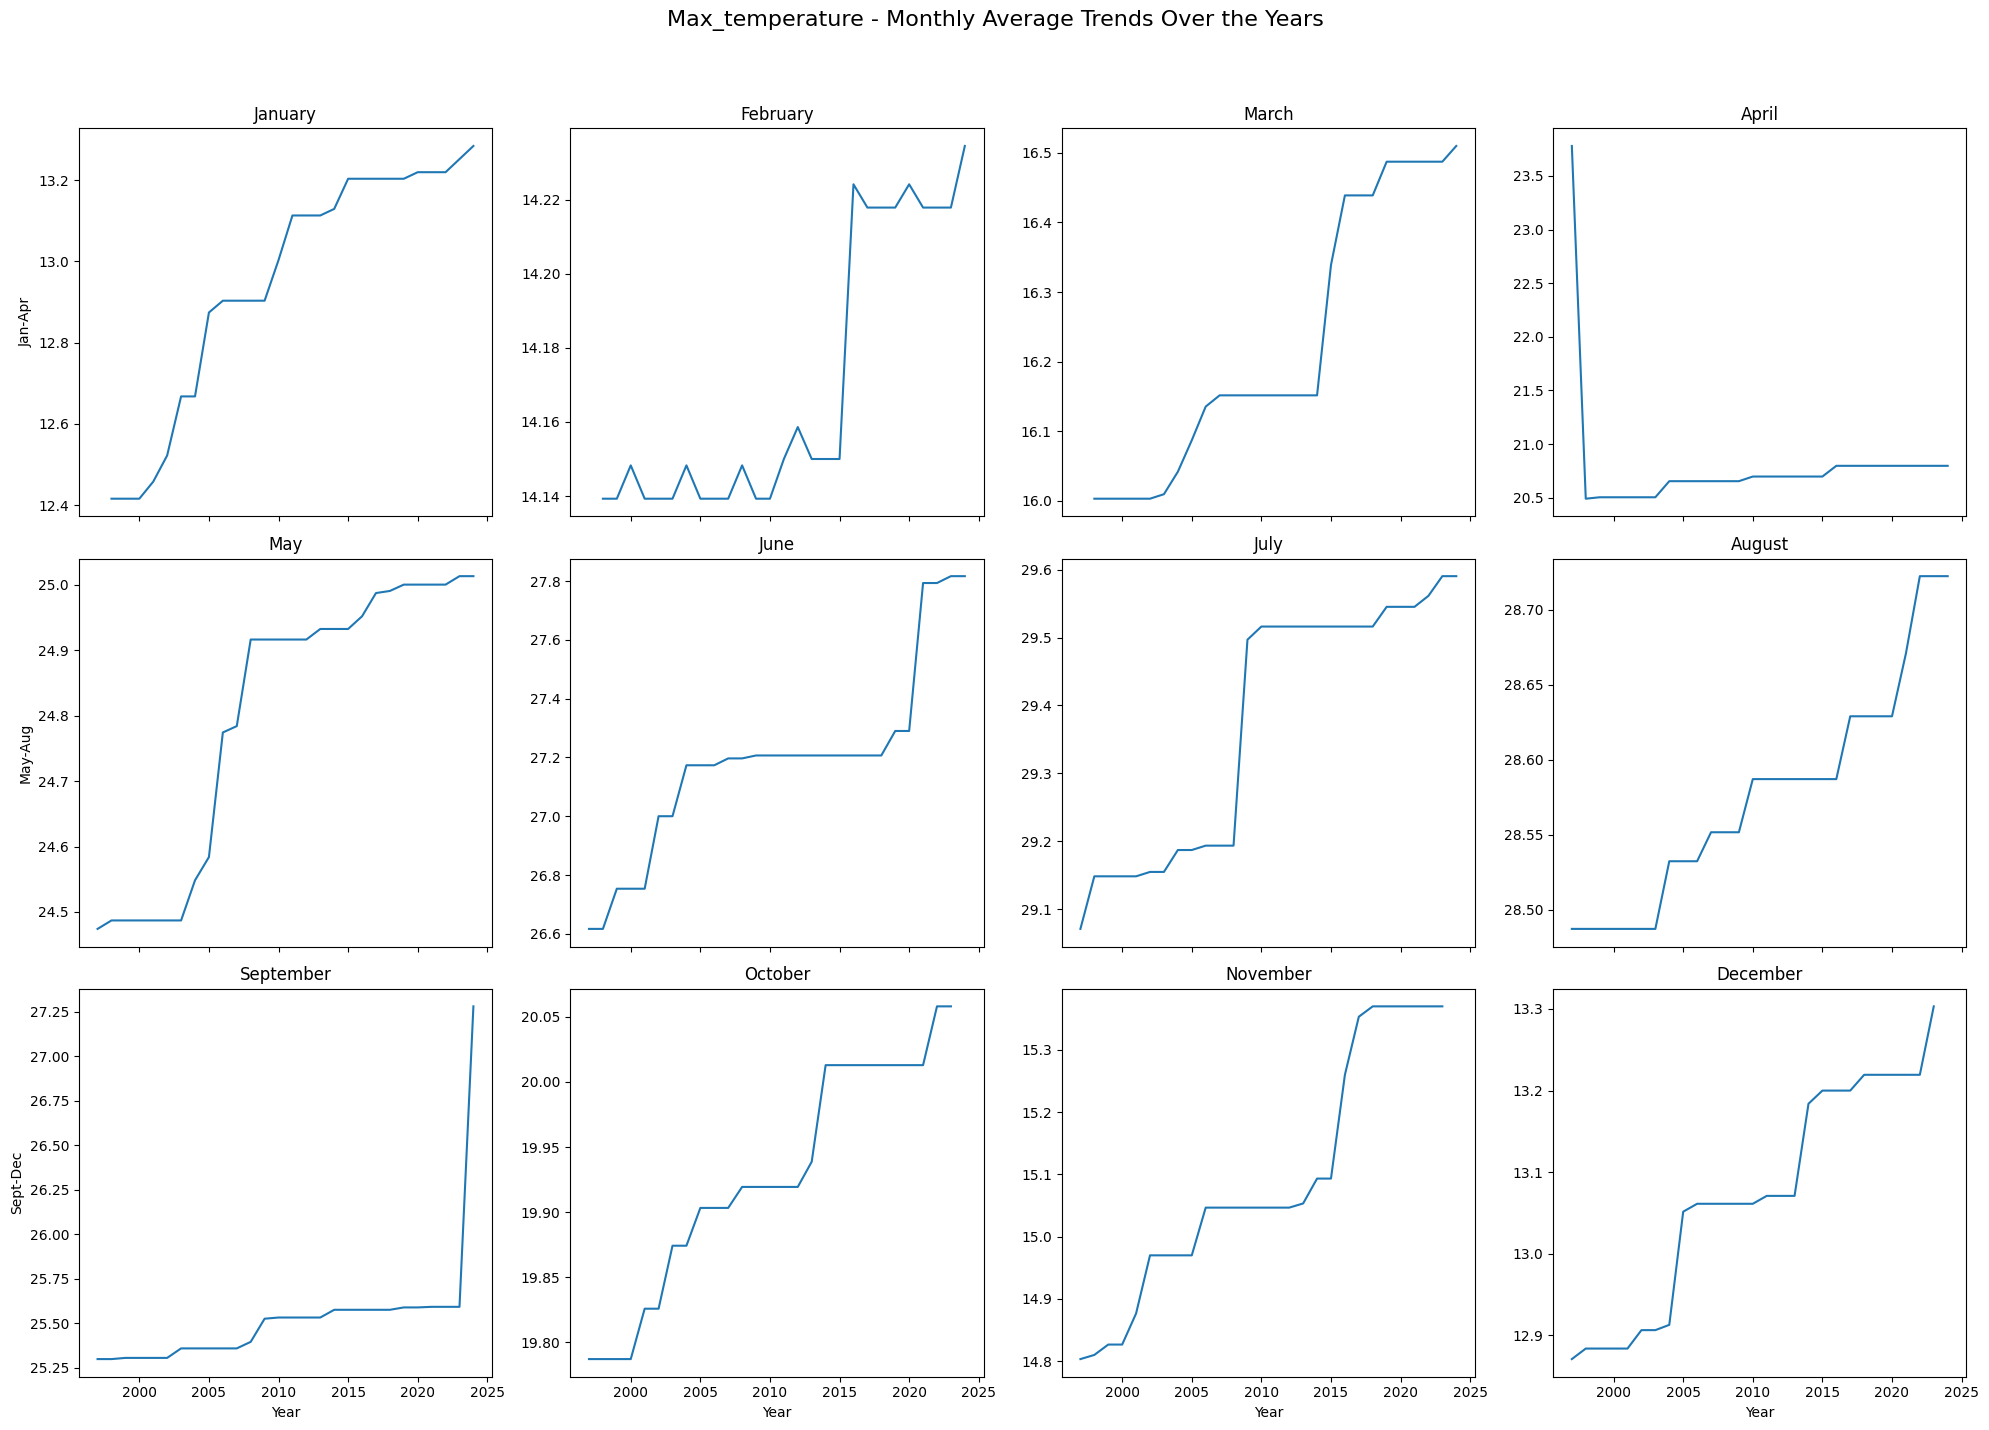

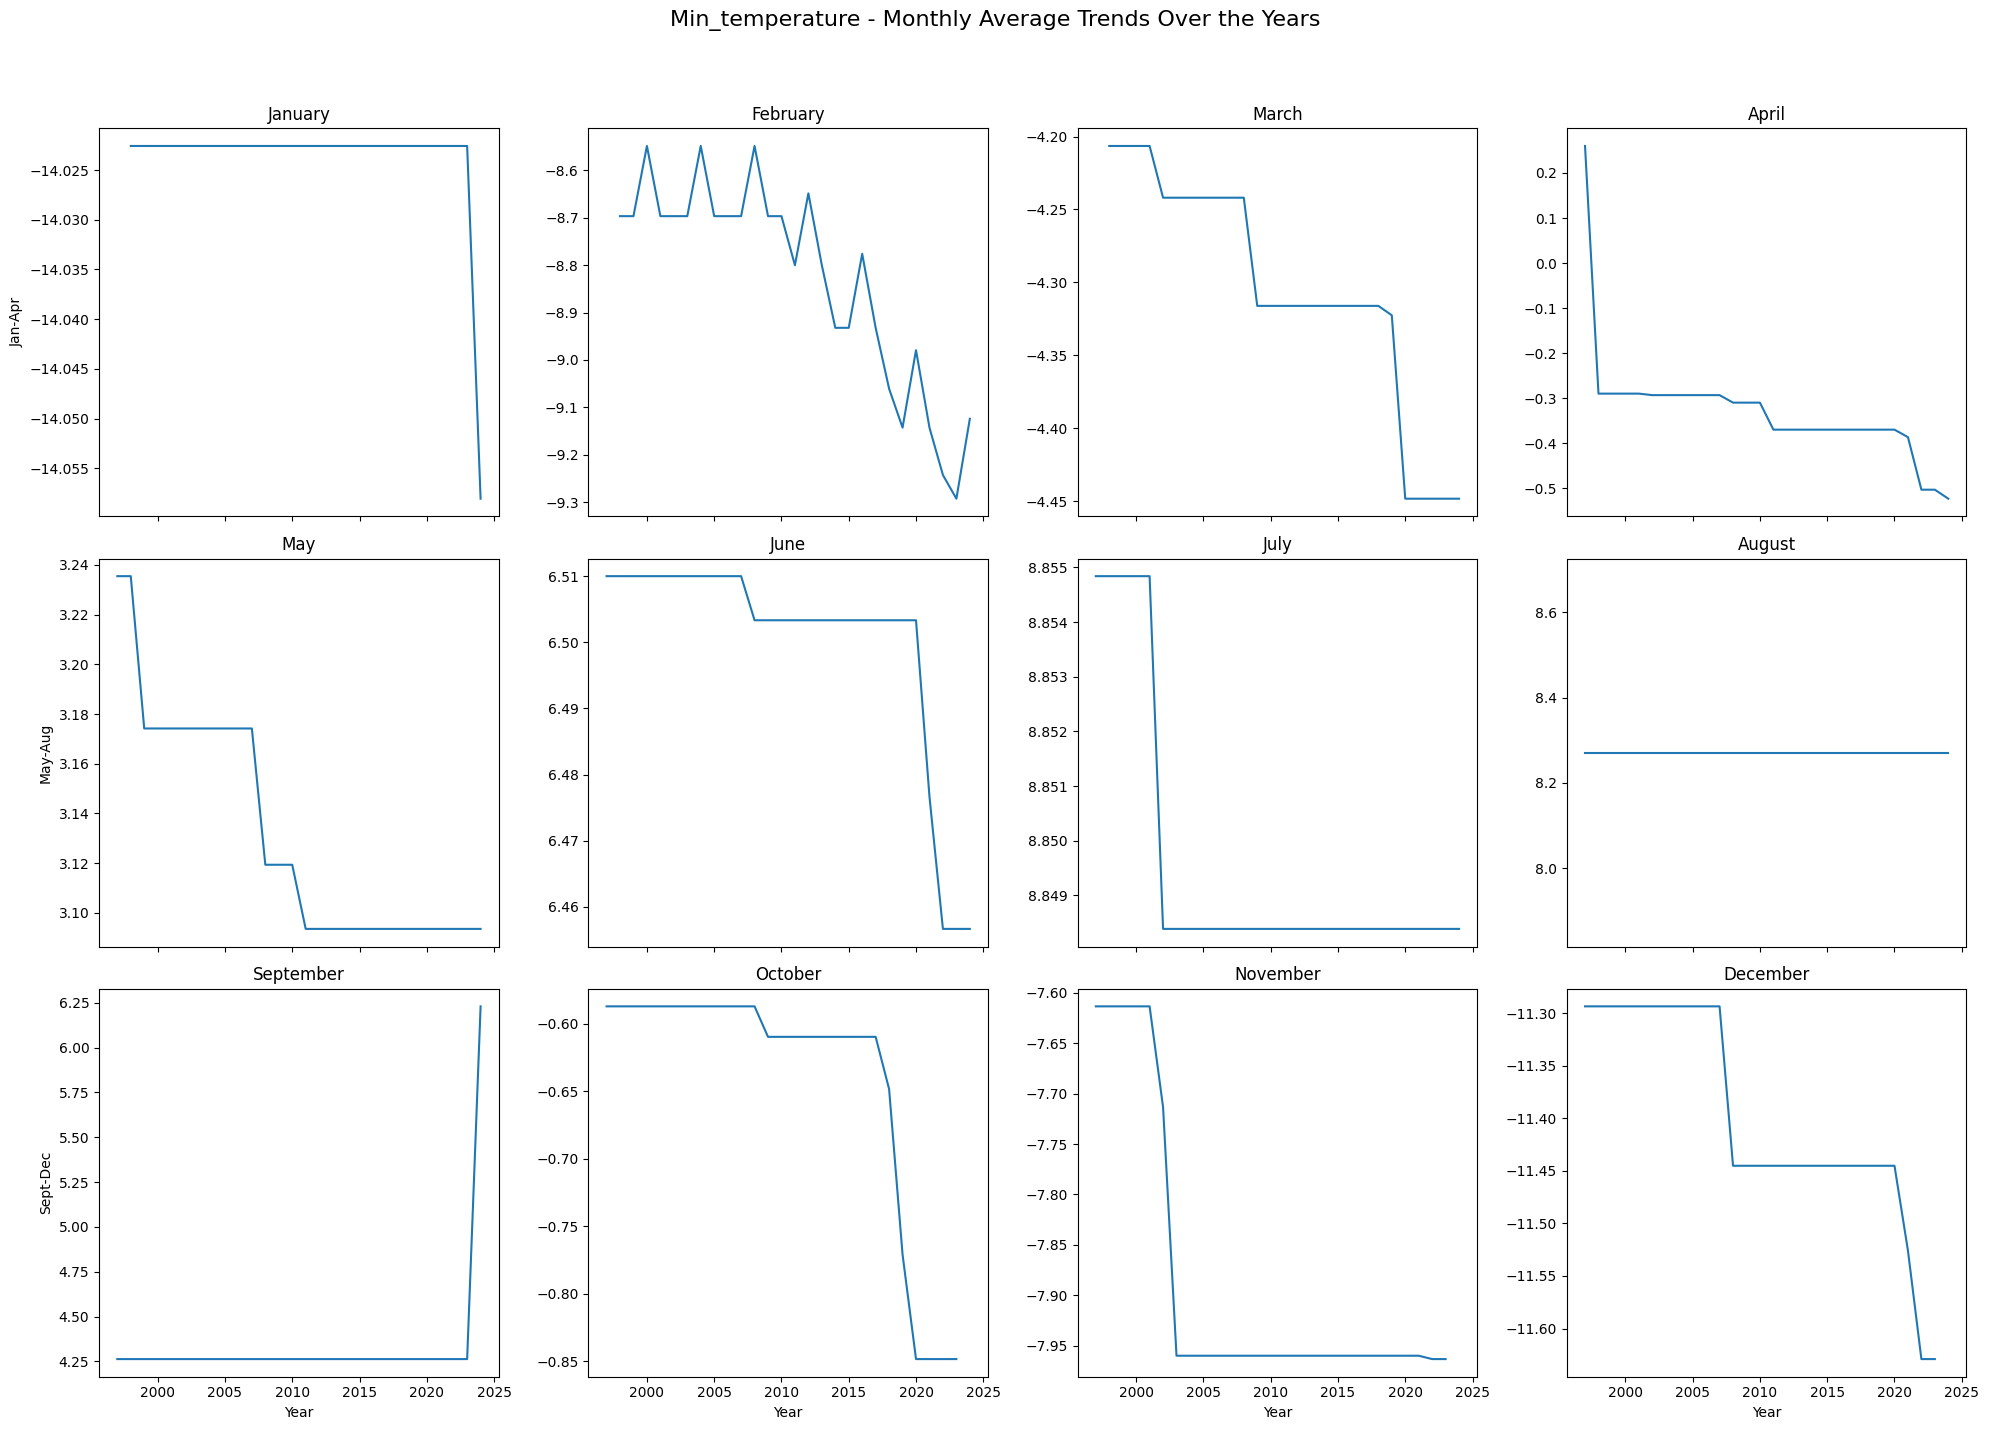

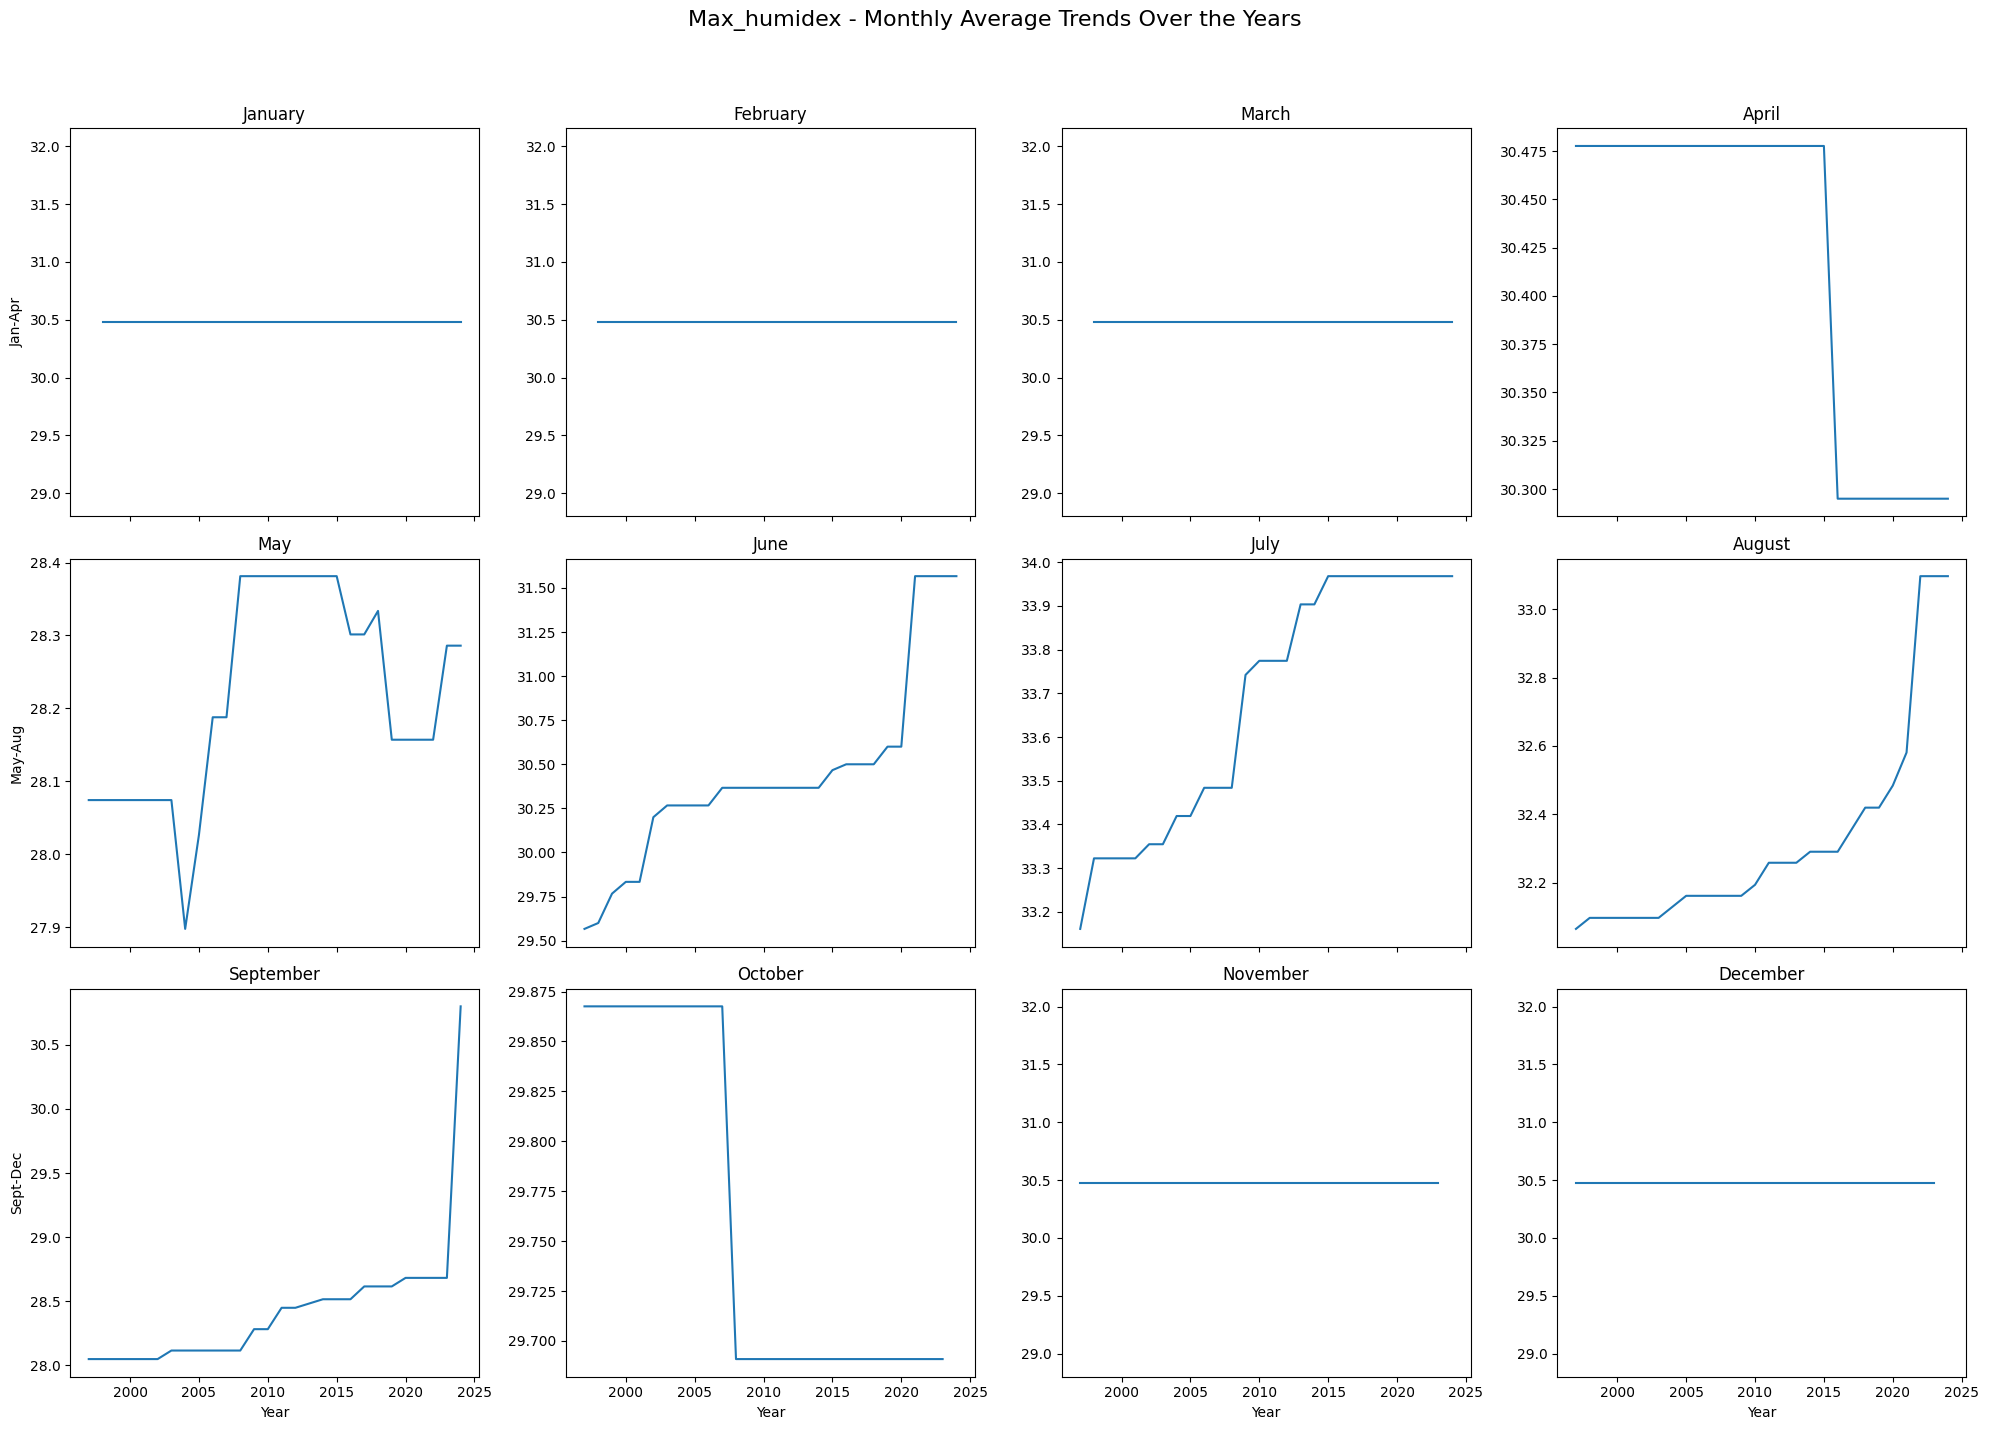

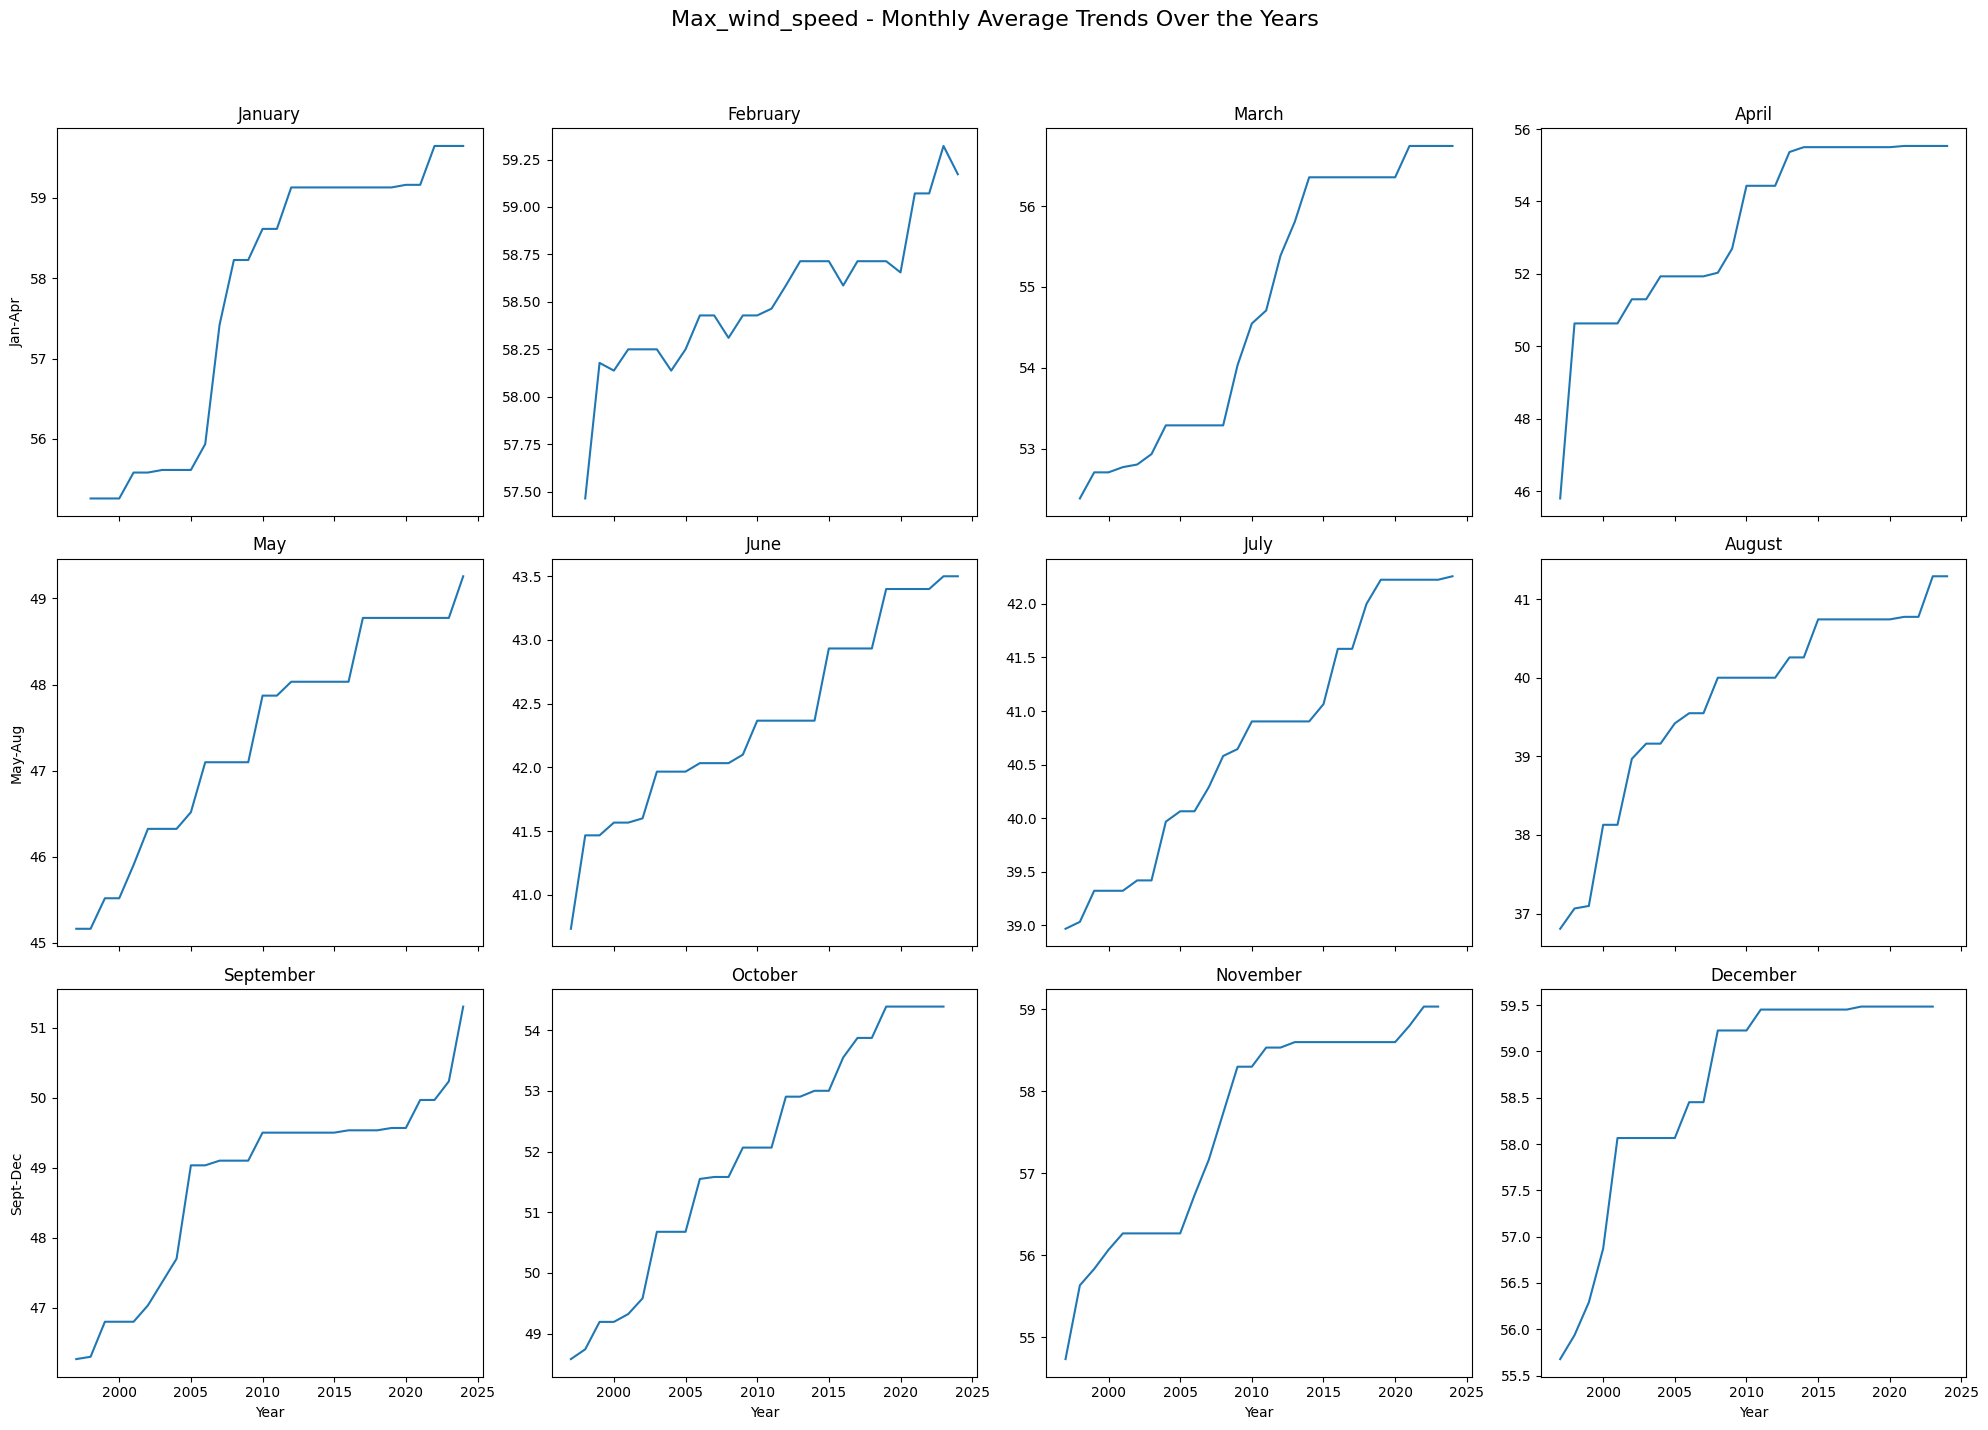

In [38]:
# Extract month and year for grouping
ts_data['month'] = ts_data['date'].dt.month
ts_data['year'] = ts_data['date'].dt.year

variables = ['max_dew_point', 'min_dew_point', 'max_temperature', 'min_temperature','max_humidex','max_wind_speed']

# Compute within-month averages for each variable
monthly_avg = ts_data.groupby(['year', 'month'])[variables].mean().reset_index()

# Time-Series Visualization by Month
month_groups = [(1, 4), (5, 8), (9, 12)]
month_labels = ['Jan-Apr', 'May-Aug', 'Sept-Dec']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, variable in enumerate(variables):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=False)
    fig.suptitle(f'{variable.capitalize()} - Monthly Average Trends Over the Years', fontsize=16)
    
    for row, (start_month, end_month) in enumerate(month_groups):
        for month in range(start_month, end_month + 1):
            ax = axes[row, month - start_month]
            monthly_data = monthly_avg[monthly_avg['month'] == month]
            ax.plot(monthly_data['year'], monthly_data[variable], label=f'{months[month - 1]}')
            ax.set_title(f'{months[month - 1]}')
            if row == 2:
                ax.set_xlabel('Year')
            if month == start_month:
                ax.set_ylabel(month_labels[row])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

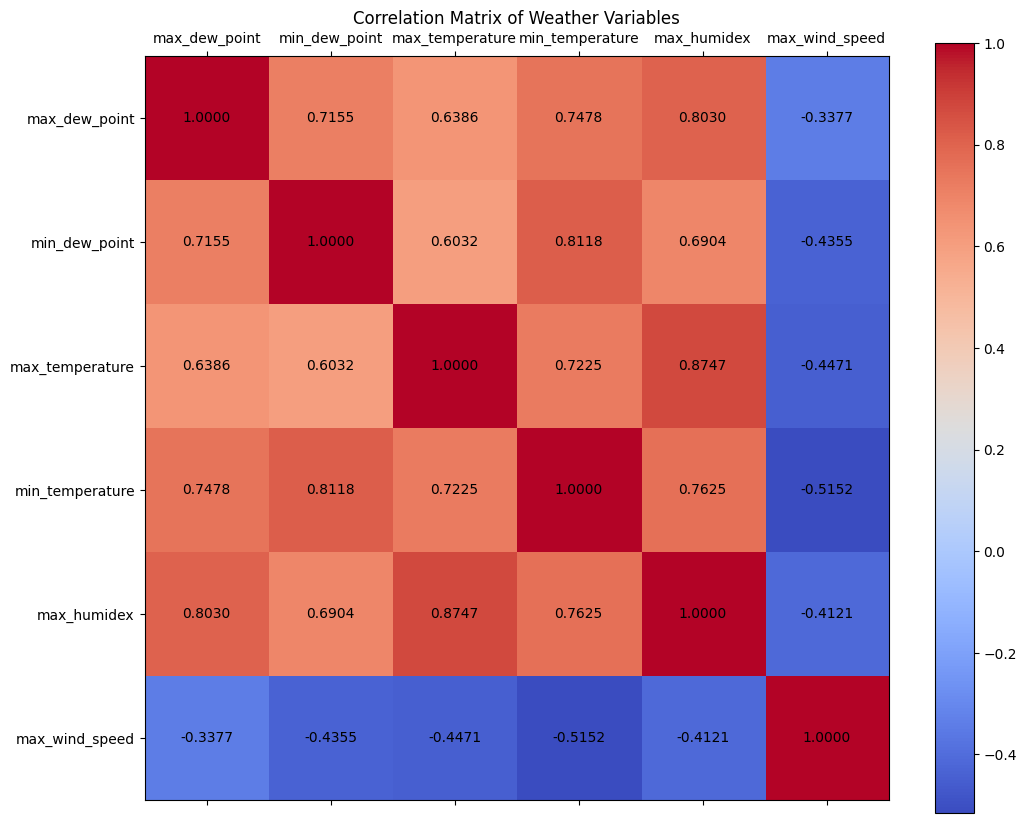

In [65]:
# Correlation Matrix

# Cleaning data with no NA values
cm_data=ts.dropna()
cm = cm_data[variables].corr()

# Set figure size and color
fig, ax = plt.subplots(figsize=(12, 10))
plt.colorbar(ax.matshow(cm, cmap='coolwarm'))

# Set ticks to show variable names
ax.set_xticks(range(len(cm.columns)))
ax.set_yticks(range(len(cm.index)))
ax.set_xticklabels(cm.columns)
ax.set_yticklabels(cm.index)

# Add correlation coefficients
for i in range(len(cm.columns)):
    for j in range(len(cm.index)):
        ax.text(j, i, f'{cm.iloc[i, j]:.4f}', ha='center', va='center')

plt.title('Correlation Matrix of Weather Variables')
plt.show()


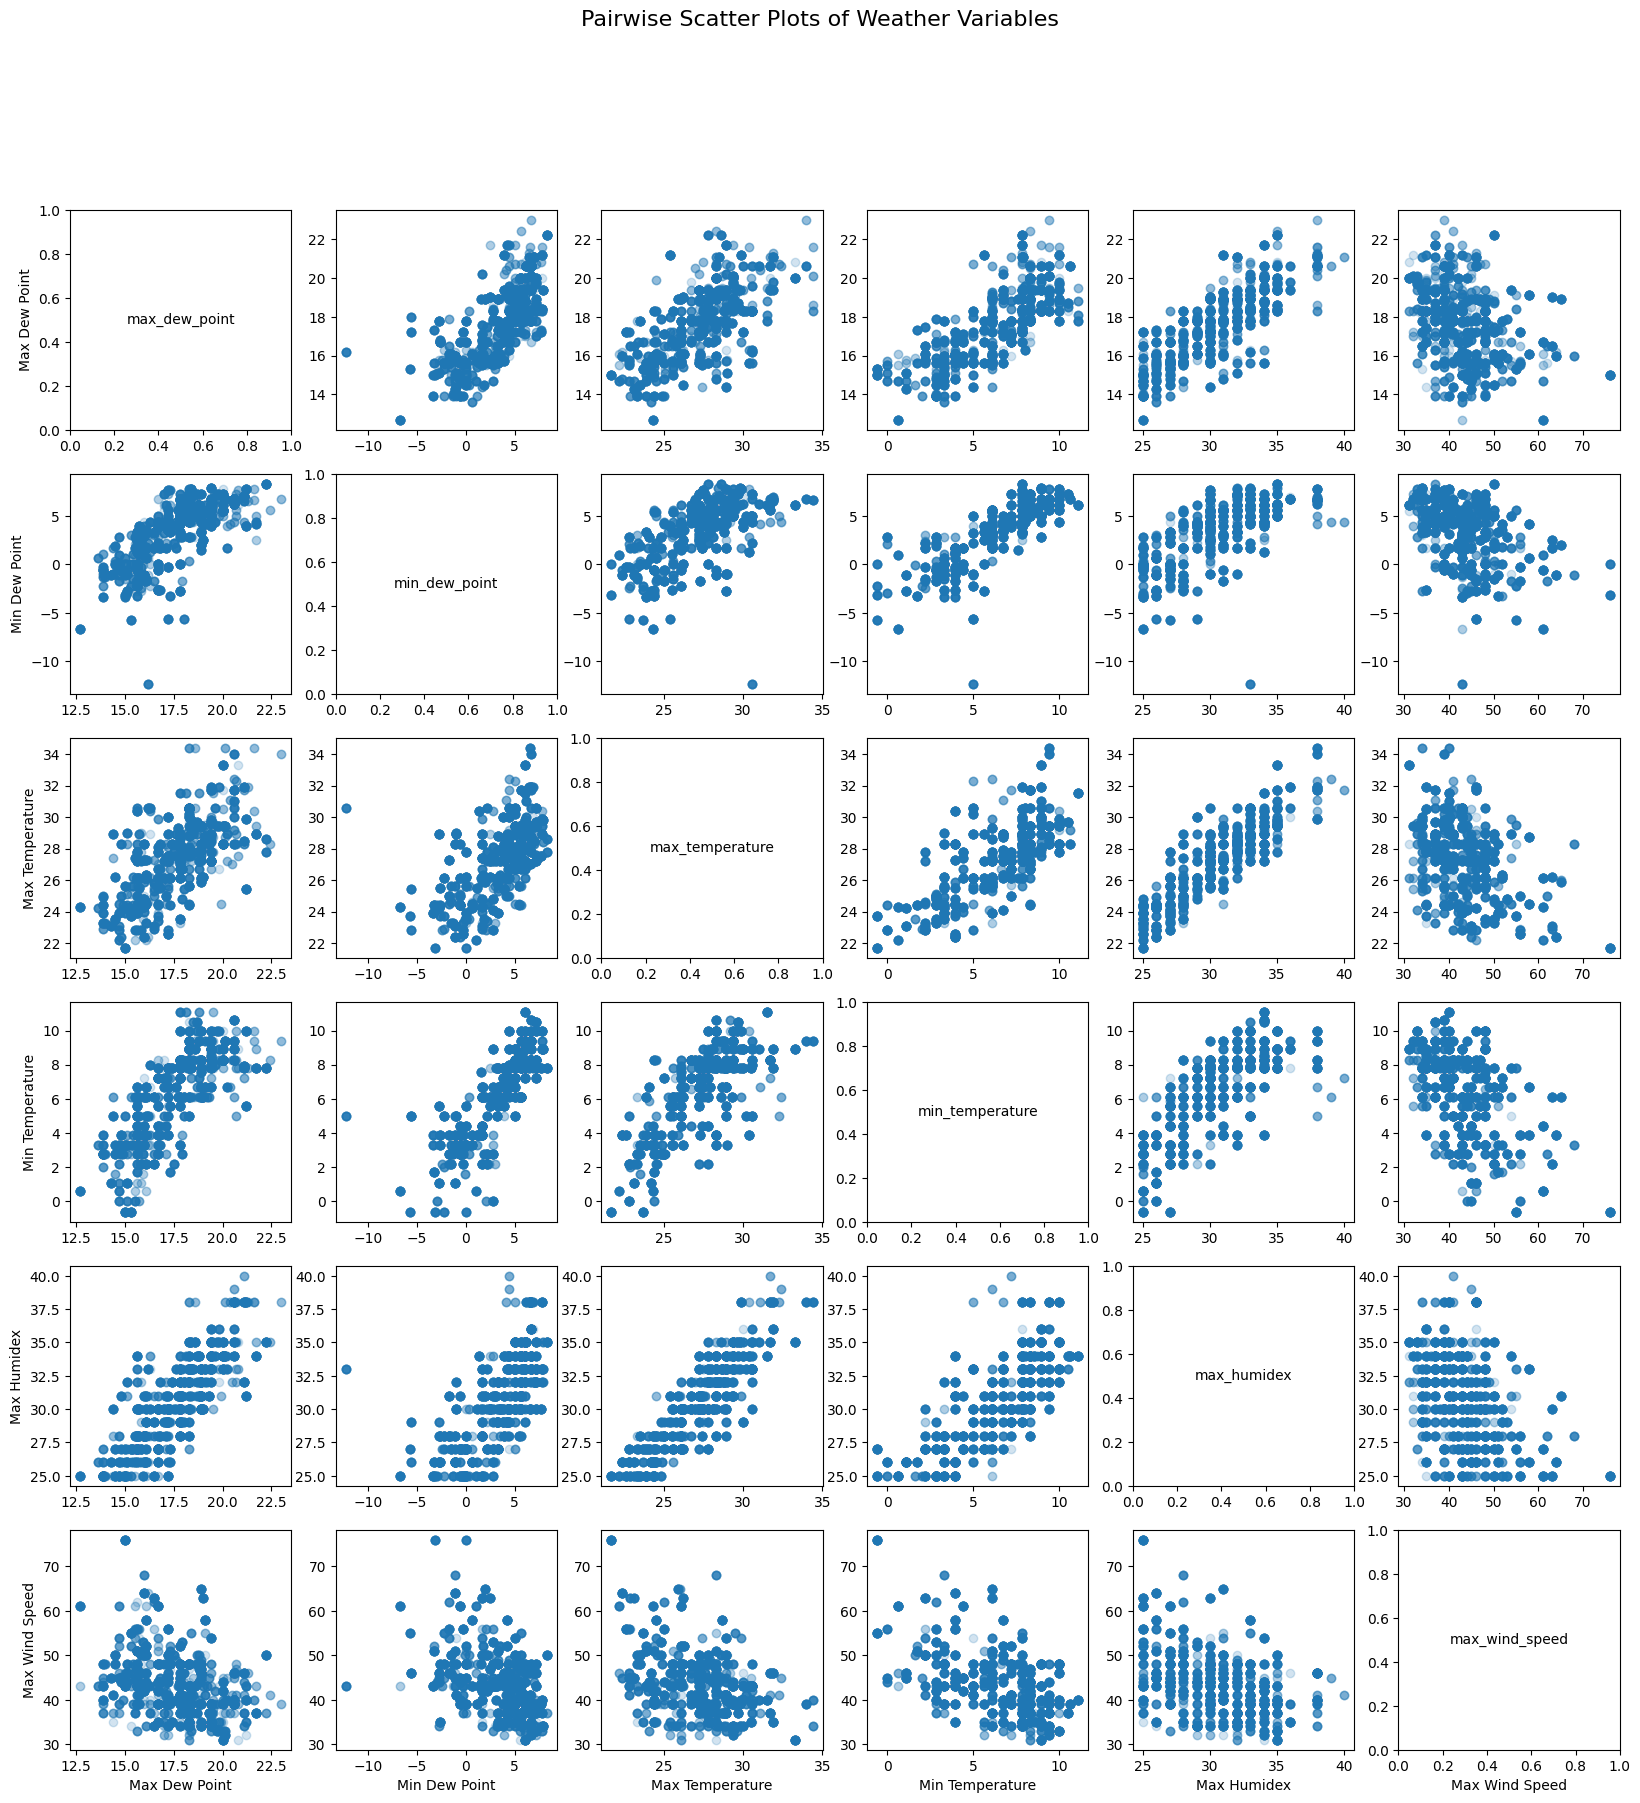

In [79]:
# Using Scatter Plot for Pairwise Relationship
fig, axes = plt.subplots(len(variables), len(variables), figsize=(20, 20))
fig.suptitle('Pairwise Scatter Plots of Weather Variables', fontsize=16)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]
        if i != j:
            ax.scatter(cm_data[var2], cm_data[var1], alpha=0.2)
        elif i == j:
            ax.text(0.5, 0.5, var1, ha='center', va='center')
            
        if i == len(variables) - 1:
            ax.set_xlabel(var2.replace('_', ' ').title())
        if j == 0:
            ax.set_ylabel(var1.replace('_', ' ').title())

plt.show()